In [1]:
%matplotlib inline
import parameters
import HULib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import glue
parameters.saveme=True
parameters.plotme=True
parameters.glueme = True  # load data to glue for manipulation of the Universe

In [5]:
def normalizeMe(myGalaxy):
    df0=pd.DataFrame({'Me' : myGalaxy.groupby( ['alpha', 'DEC'])['Me'].sum()}).reset_index()
    df0=df0[df0.Me>0]
    df0["alpha"]=4.0/np.pi*df0.alpha
    # Calculate number of datapoints for normalization along distance
    dfcount=pd.DataFrame({'Me' : myGalaxy.groupby( ['alpha'])['Me'].count()}).reset_index()
    dfcount.Me=dfcount.Me/10000    # accommodate for photon path
    dfcount["alpha"]=4.0/np.pi*dfcount.alpha
    # Correct Luminosity
    df0.Me=1000*df0.Me* df0.alpha*df0.alpha
    dfcount=dfcount.set_index(["alpha"])
    df0=df0.set_index(["alpha","DEC"],)
    df0=df0/dfcount
    df0.reset_index(inplace=True) 
    # accommodate increasing surface covered by the data
    # the reason for adjusting dfcount here is because the aggregation of mass pays not attention to the increasing volume
    # thus the normalization above should be done before we adjust dfcount to get obs/UnitOfVolume
    dfcount.Me=dfcount.Me/dfcount.index**2
    return df0, dfcount
    

# Binning

0 DEC galaxy_DR12v5_LOWZ_North.fits galaxy_DR12v5_CMASS_North.fits
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
1 DEC galaxy_DR12v5_LOWZ_South.fits galaxy_DR12v5_CMASS_South.fits
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
2 RA galaxy_DR12v5_LOWZ_North.fits galaxy_DR12v5_CMASS_North.fits
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', '

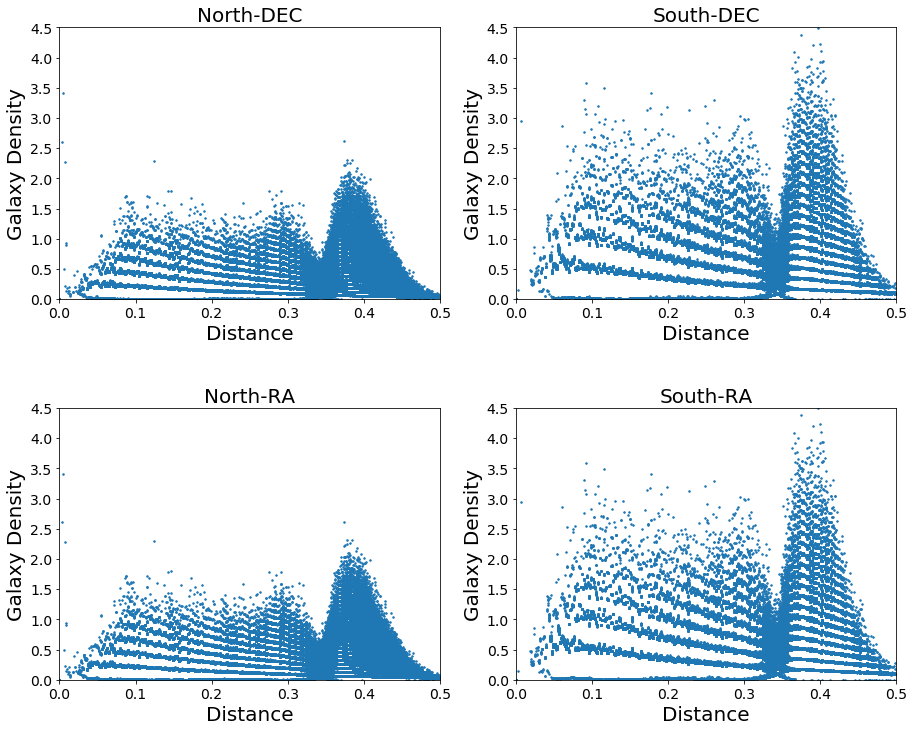

In [12]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=.4)


rangesx= [(0,0.5),(0.0,0.5),(0,0.5),(0.0,0.5)]
rangesy= [(0,4.5),(0.0,4.5),(0,4.5),(0.0,4.5)]
position = [(0,0),(0,1),(1,0),(1,1)]
titleCode=['North-DEC','South-DEC','North-RA','South-RA',]

for i in range(4):
    key = myKeys[i][0]
    val1 = myKeys[i][1]
    val2 = myKeys[i+4][1]
    print(i,key,val1,val2)
    myGalaxy = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + val1),
                         HULib.get_BOSS_data(parameters.sdssAddress + val2)])
    myGalaxy = HULib.fix_BOSS_data(myGalaxy)
    df0, dfcount= normalizeMe(myGalaxy)
    df0.plot(ax=axes[position[i]], x='alpha', y='Me',style='.',xlim=rangesx[i], 
             fontsize=14, ylim=rangesy[i],legend=False,markersize=3)
    axes[position[i]].set_title(titleCode[i], fontsize=20 )
    axes[position[i]].set_ylabel("Galaxy Density", fontsize=20)
    axes[position[i]].set_xlabel("Distance", fontsize=20)
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsGlobalNorm.png', dpi=300)
    
plt.show()

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


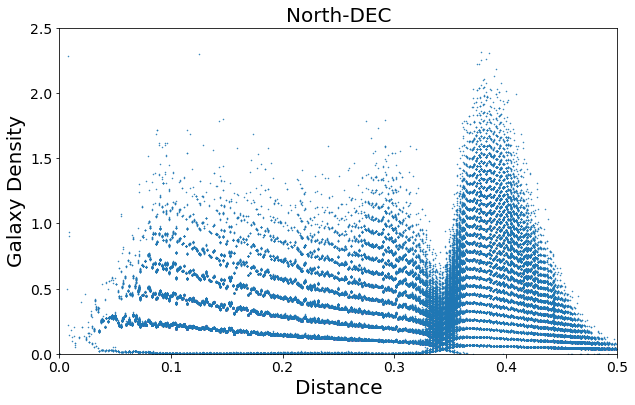

In [10]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

rangesx= (0.0,0.5)
rangesy= (0,2.5)
titleCode=['North-DEC']

myGalaxy0 = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_LOWZ_North.fits')
myGalaxy1 = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits')
myGalaxy = pd.concat([myGalaxy0, myGalaxy1])   
myGalaxy = HULib.fix_BOSS_data(myGalaxy)

df0, dfcount= normalizeMe(myGalaxy)

axes=df0.plot( x='alpha', y='Me',style='.',fontsize=14,ylim=rangesy,xlim=rangesx,
              legend=False,markersize=1,figsize=(10, 6))
axes.set_title('North-DEC', fontsize=20 )
axes.set_ylabel("Galaxy Density", fontsize=20)
axes.set_xlabel("Distance", fontsize=20)
fig = plt.gcf()
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsNorthMASSNorm.png', dpi=300)
    
plt.show()

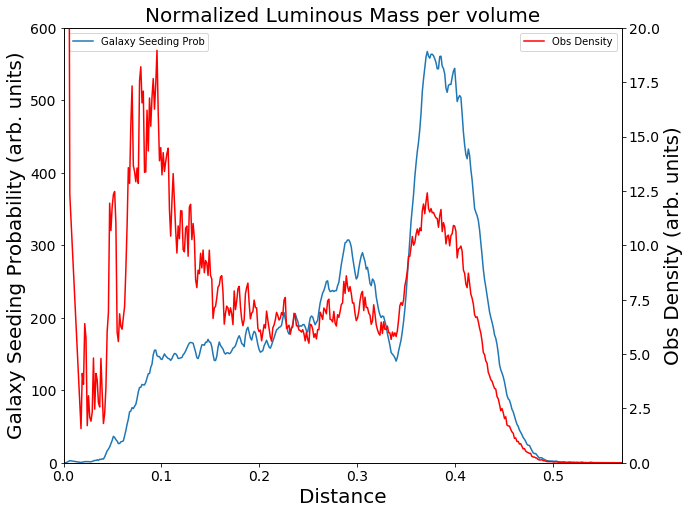

In [15]:
df_total_mass=pd.DataFrame({'Galaxy Seeding Prob' : df0.groupby( ['alpha'])['Me'].sum()}).reset_index()
ax=df_total_mass.plot(x="alpha"  , y="Galaxy Seeding Prob", figsize=(10,8), fontsize=14)
ax.set_xlabel("Distance", fontsize=20)
ax.set_ylabel("Galaxy Seeding Probability (arb. units)", fontsize=20)
ax.set_title("Normalized Luminous Mass per volume", fontsize=20)
ax.set_xlim(0,0.5)
ax.set_ylim(0,600)
ax2 = ax.twinx()
ax2.set_ylim(0,20)
ax2.set_ylabel("Obs Density (arb. units)", fontsize=20)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h2+h1, l1+l2, loc=2)
dfcountplot=dfcount.copy()
dfcountplot.columns= ['Obs Density']
dfcountplot["Obs Density"]*=5
dfcountplot.plot(y="Obs Density", ax=ax2, color="red", fontsize=14)

fig = plt.gcf()
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'NormalizedSeedProb.png', dpi=300)

# NO BINNING

In [ ]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=.4)


rangesx= [(0,1.2),(0.0,1.2),(0,1.2),(0.0, 1.2)]
rangesy= [(0,20.9),(0.0,20.9),(0,20.0),(0.0,20.0)]
position = [(0,0),(0,1),(1,0),(1,1)]
titleCode=['North-DEC','South-DEC','North-RA','South-RA',]

for i in range(4):
    key = myKeys[i][0]
    val1 = myKeys[i][1]
    val2 = myKeys[i+4][1]
    print(i,key,val1,val2)
    myGalaxy = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + val1),
                         HULib.get_BOSS_data(parameters.sdssAddress + val2)])
    myGalaxy = HULib.fix_BOSS_data_noBinning(myGalaxy)
    df0, dfcount= normalizeMe(myGalaxy)
    df0.plot(ax=axes[position[i]], x='alpha', y='Me',style='.',xlim=rangesx[i], 
             fontsize=14, ylim=rangesy[i],legend=False,markersize=3)
    axes[position[i]].set_title(titleCode[i], fontsize=20 )
    axes[position[i]].set_ylabel("Galaxy Density", fontsize=20)
    axes[position[i]].set_xlabel("Redshift Z - No Binning", fontsize=20)
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsGlobal_noBinning.png', dpi=300)
    
plt.show()

In [ ]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),   
('DEC', 'galaxy_DR12v5_CMASS_South.fits'), 
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

rangesx= (0.,1.2)
rangesy= (0,0.5)
titleCode=['North-DEC']

myGalaxy = HULib.get_BOSS_data(parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits')
myGalaxy = HULib.fix_BOSS_data_noBinning(myGalaxy)
df0, dfcount= normalizeMe(myGalaxy)
axes=df0.plot( x='alpha', y='Me',style='.',xlim=rangesx, 
         fontsize=14, ylim=rangesy,legend=False,markersize=1,figsize=(10, 6))

axes.set_title('North-DEC', fontsize=20 )
axes.set_ylabel("Galaxy Density", fontsize=20)
axes.set_xlabel("Redshift Z - No Binning", fontsize=20)
fig = plt.gcf()
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'ManyBangsNorthMASS_noBinning.png', dpi=300)
    
plt.show()

# Calculate the number of galaxies per distance

In [ ]:
gal = parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits';
myGalaxy0 = HULib.get_BOSS_data(gal)
numGalaxies=myGalaxy0.shape[0]
df=myGalaxy0.Z.to_frame()
df["alpha"]=[HULib.alphaZ(x)*4/np.pi for x in df.Z]
# Just a figure and one subplot
fig, ax = plt.subplots()
hist = df.hist(column="Z", bins=100, ax=ax)
ax.set_xlabel("Redshift Z", fontsize=20)
ax.set_ylabel("Number of Galaxies", fontsize=20)
plt.xlim((0.0,1.0))
ax.set_title('Number of Galaxies per Redshift Z', fontsize=20)
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'NumGalaxiesPerZ.png', dpi=300)

In [ ]:
gal = parameters.sdssAddress + 'galaxy_DR12v5_CMASS_North.fits';
myGalaxy0 = HULib.get_BOSS_data(gal)
numGalaxies=myGalaxy0.shape[0]
df=myGalaxy0.Z.to_frame()
df["alpha"]=[HULib.alphaZ(x)*4/np.pi for x in df.Z]
# Just a figure and one subplot
fig, ax = plt.subplots()
hist = df.hist(column="alpha", bins=100, ax=ax)
ax.set_xlabel("Normalized Distance", fontsize=14)
ax.set_ylabel("Number of Galaxies", fontsize=14)
plt.xlim((0.0,0.5))
ax.set_title('Number of Galaxies per Distance', fontsize=16)
fig = plt.gcf()
fig.savefig(parameters.imgAddress + 'NumGalaxiesPerDistance.png', dpi=300)

# Universe Cross-Section Calculation

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),
                           HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'DEC'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[1]),HULib.get_BOSS_data(parameters.sdssAddress + gals[3])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'DEC'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    myGalaxy1.alpha=4/np.pi*myGalaxy1.alpha
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'RA'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[0]),HULib.get_BOSS_data(parameters.sdssAddress + gals[2])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    myGalaxy1.alpha=4/np.pi*myGalaxy1.alpha
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)

In [ ]:
if parameters.glueme:
    gals = ['galaxy_DR12v5_CMASS_North.fits','galaxy_DR12v5_CMASS_South.fits',
           'galaxy_DR12v5_LOWZ_North.fits','galaxy_DR12v5_LOWZ_South.fits']
    myGalaxy1 = pd.concat([HULib.get_BOSS_data(parameters.sdssAddress + gals[1]),HULib.get_BOSS_data(parameters.sdssAddress + gals[3])])
    myGalaxy1 = HULib.fix_BOSS_data(myGalaxy1)
    df0 = pd.DataFrame({'Me': myGalaxy1.groupby(['alpha', 'RA'])['Me'].sum()}).reset_index()
    glue.qglue(star=df0)